Here we'll just do a little bit of plotting and such to examine the data being used in the challenge. Always good to have a handle on what we're dealing with

In [1]:
import configparser
import torch
import numpy as np
from idao.data_module import IDAODataModule
import pathlib as path
import matplotlib.pyplot as plt

In [2]:
# Read config.ini file
config = configparser.ConfigParser()
config.read("./config.ini")

PATH = path.Path(config["DATA"]["DatasetPath"])

In [3]:
# Build class used to generate torch dataloaders
dataset_dm = IDAODataModule(
    data_dir=PATH, batch_size=100, cfg=config
)
dataset_dm.prepare_data()
dataset_dm.setup()

In [4]:
# Get dataloaders
train = dataset_dm.train_dataloader()
valid = dataset_dm.val_dataloader()
test = dataset_dm.test_dataloader()

In [5]:
# Print their lengths
print(len(train))
print(len(valid))
print(len(test))

100
34
166


In [0]:
# Now show some of the images from the training set, along with labels
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train), size=(1,)).item()
    img, label, en, en_class = train.dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(str(label))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
# Okay now we probably want to look at signal/background ratios, and also energy distributions in each set.
# This is going to run slow because pytorch is loading batches directly from files I believe?

num_sig = 0
num_bkg = 0
en_list = []

for ind, batch in enumerate(train):
    img, labels, en, en_class = batch

    sums = np.sum(labels.numpy(), axis=0)
    num_sig += sums[1]
    num_bkg += sums[0]

    en_list.append(en)
    
print("Background events: ", num_bkg)
print("Signal events: ", num_sig)

# Send en lists to torch tensors and plot
en_list = torch.cat(tuple(en_list))
# plt.hist(en_list, bins=100)
# plt.show()

Background events:  4947
Signal events:  5053


Ones:  1623
Threes:  1685
Sixes:  1659
Tens:  1722
Twenties:  1664
Thirties:  1647


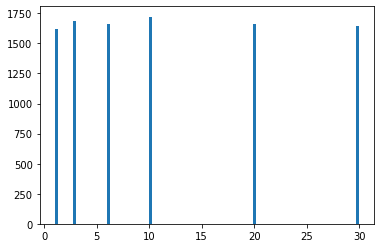

[ 6.  6. 30.  6. 20. 20.  3.  6.  1.  6. 30. 20.  1.  3.  6.  1. 30. 20.
  6. 10.]


In [17]:
en_list_np = en_list.numpy()
ones = en_list_np[en_list_np == 1.]
print("Ones: ", len(ones))
threes = en_list_np[en_list_np == 3.]
print("Threes: ", len(threes))
sixes = en_list_np[en_list_np == 6.]
print("Sixes: ", len(sixes))
tens = en_list_np[en_list_np == 10.]
print("Tens: ", len(tens))
twenties = en_list_np[en_list_np == 20.]
print("Twenties: ", len(twenties))
thirty = en_list_np[en_list_np == 30.]
print("Thirties: ", len(thirty))
plt.hist(en_list_np, bins=100)
plt.show()
print(en_list_np[:20])